<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE3-WEEK2/m03w02_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# load the diabetes datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# split train:test = 8:2
X_train,X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

# build KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict and Evaluate test set
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

In [ ]:
# Import library
!pip install -q datasets
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']

# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()


y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.60444

# K-Mean

In [73]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
# taking iris data that was labeled
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [75]:
data = iris_dataset.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
# create a dataframe
df = pd.DataFrame(data, columns=iris_dataset.feature_names)
# take two first columns
data = iris_dataset.data[:, :2]
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

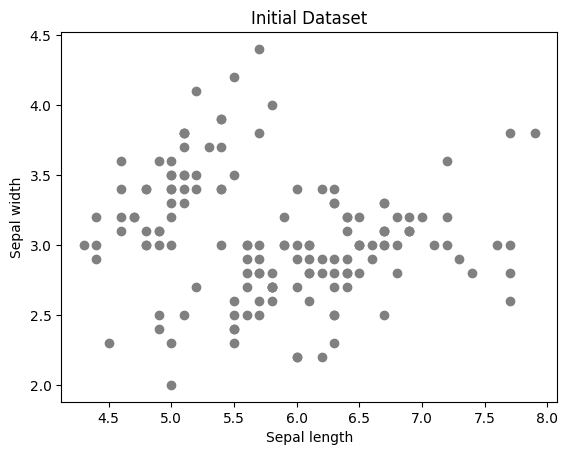

In [8]:
# data visualisation
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [93]:
# clustering
class K_mean:
  def __init__(self, k, max_iter=100):
    self.k = k
    self.max_iter = max_iter
    self.centroids = None
    self.clusters = None


  # khởi tạo điểm trung tâm ban đầu bằng cách random dữ liệu đã có
  def centroids_init(self, data):
    # lấy random một vài mẫu, tuy nhiên các mẫu này sẽ không thay đổi khi chạy lại chương trình
    np.random.seed(42)
    return  data[np.random.choice(data.shape[0], self.k, replace=False)]

  # tính khoảng cách giữa hai điểm bằng công thức euclidean
  def distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

  # gom cụm lại
  def assign_clusters(self, data):
    distances = np.array([[self.distance(x, centroid) for centroid in self.centroids] for x in data])
    return np.argmin(distances, axis=1)


  # bắt đầu update centroid
  def update_centroids(self, data):
    # tại sao lại là self,clusters mà không phải self.assign_cluster(data)
    # lý do bởi vì: selt.cluster được cập nhật theo từng vòng lặp của interation để tìm ra điểm trung tâm tối ưu nhất
    new_centroids = np.array([np.mean(data[self.clusters == i], axis=0) for i in range(self.k)])
    return new_centroids

  # tạo vòng lặp cho khối dữ liệu và sau đó
  def fit(self, data):

    # tạo ngẫu nhiêm điểm trung tâm cho từng cụm
    self.centroids = self.centroids_init(data)

    self.clusters = self.assign_clusters(data)

    #self.plot_clusters(data, 0)
    for i in range(self.max_iter):

      # gán cụm với datapoint gần nhất
      self.clusters = self.assign_clusters(data)

      # cập nhật giá trị centroid sau những lần thay đổi
      new_centroids = self.update_centroids(data)

      # vẽ lại biểu đồ của mỗi vòng lặp
      self.plot_clusters(data, i+1)

      if np.all(self.centroids == new_centroids):
        break

      self.centroids = new_centroids
      self.plot_clusters(data, i)

    self.plot_final_clusters(data)

      # trả về kết quả cuối cùng
    return self.centroids, self.clusters





  def plot_clusters(self, data, iteration):
    plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='rainbow', marker='o', alpha=0.6)
    plt.scatter(self.centroids[:,0], self.centroids[:,1], c='black', marker='x', s=300)
    plt.title(f"Iteration {iteration+1}")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()


  def plot_final_clusters(self, data):
    plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(self.centroids[:,0], self.centroids[:,1], s=300, c='red', marker='x')
    plt.title("Final Clusters and Centroids")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()




## test k=2

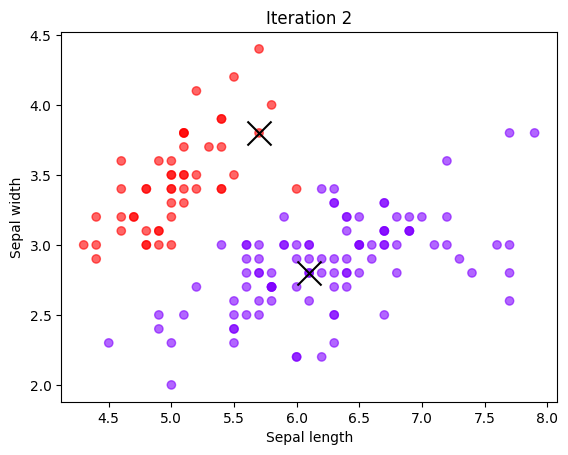

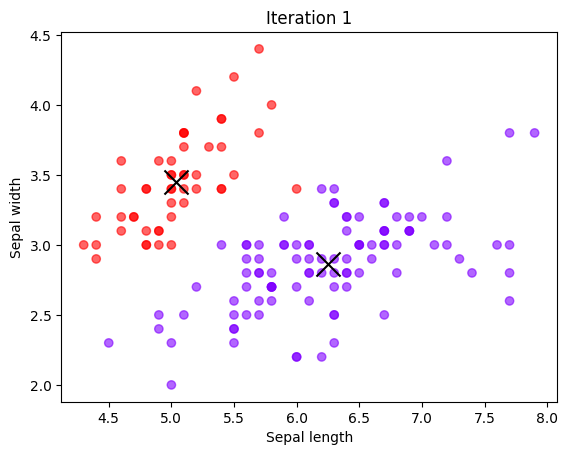

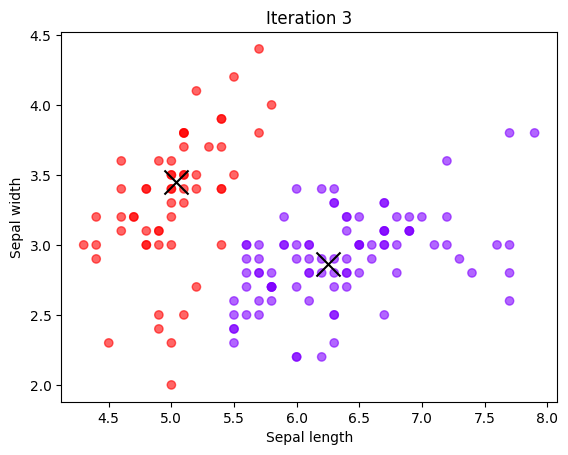

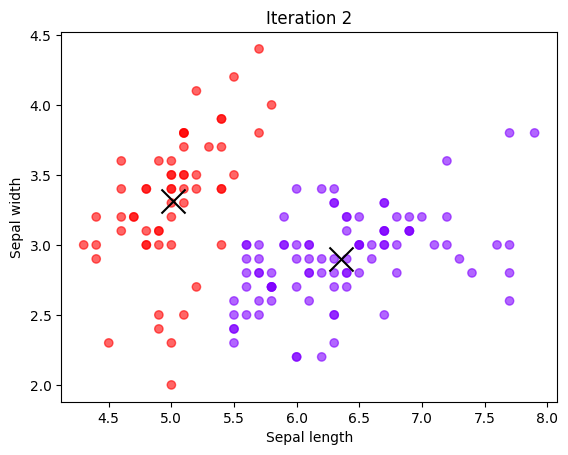

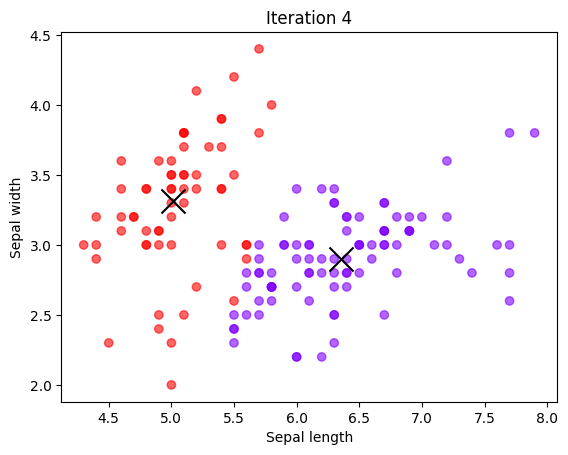

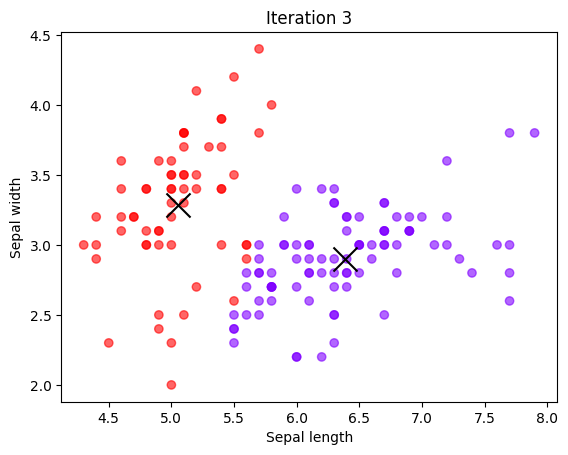

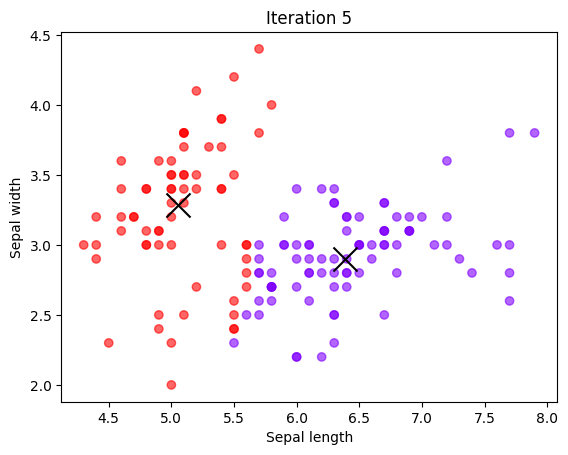

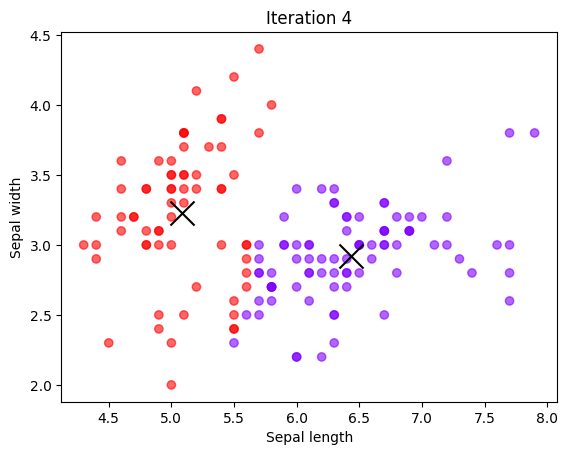

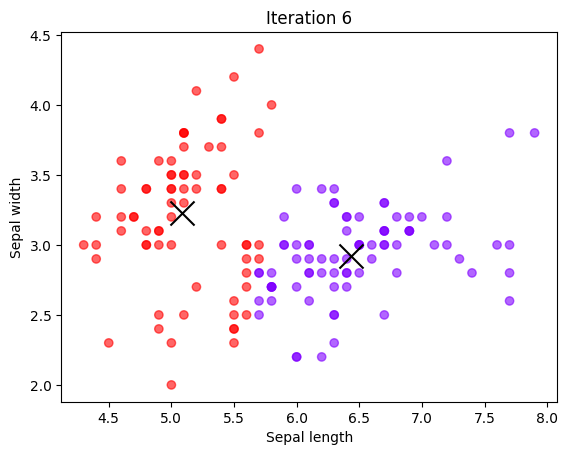

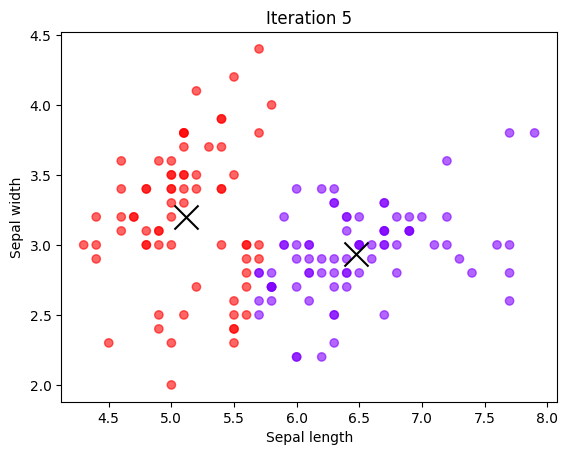

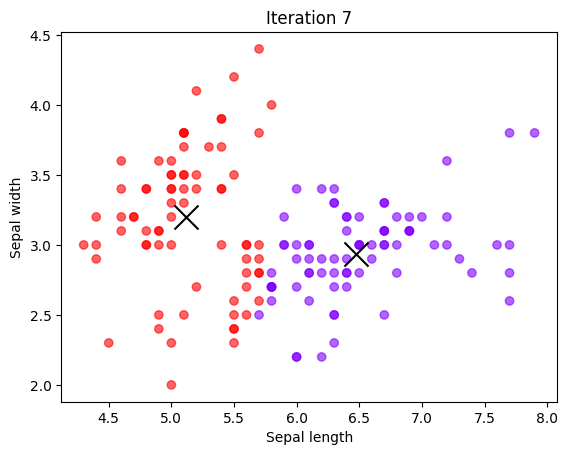

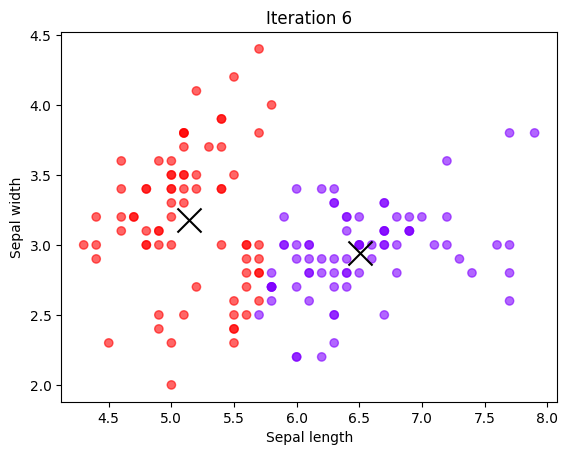

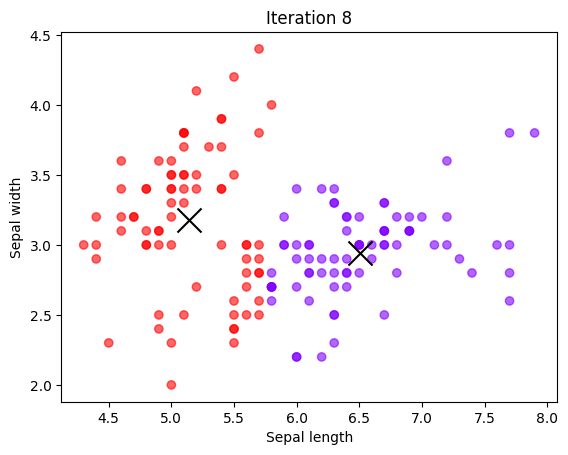

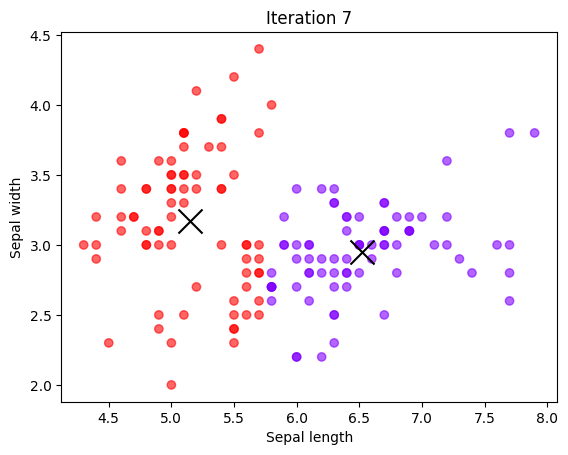

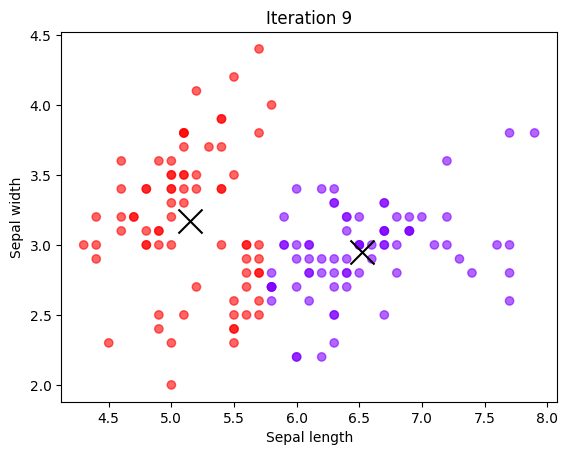

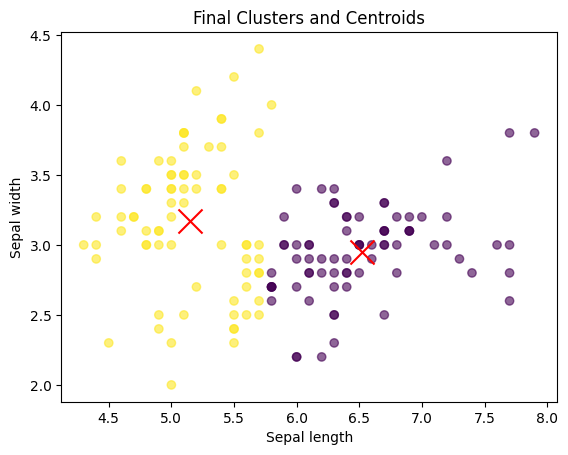

(array([[6.51842105, 2.94868421],
        [5.15      , 3.16891892]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [94]:
kmeans = K_mean(k=2)
kmeans.fit(data)

In [90]:
print(data[1:4,:])
np.random.seed(42)
m = data[np.random.choice(data.shape[0], 2, replace=False)]
print(m)

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]]
[[6.1 2.8]
 [5.7 3.8]]


In [82]:
np.random.seed(42)
m = np.random.choice(data.shape[0], 2, replace=False).reshape(1,-1)
print(m)
m.shape

[[73 18]]


(1, 2)

## Test k=3

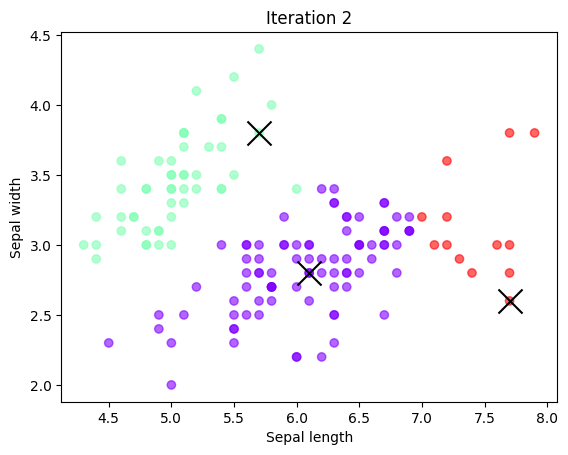

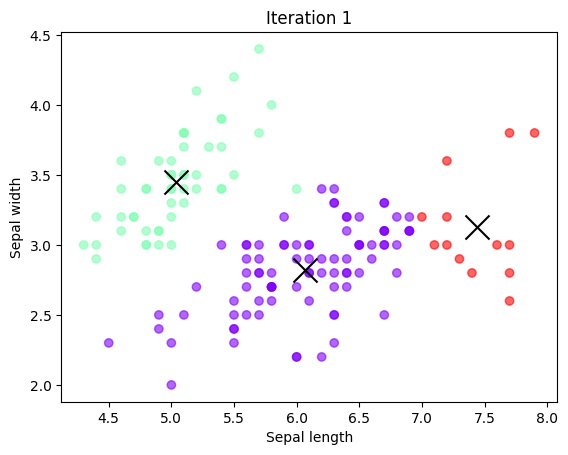

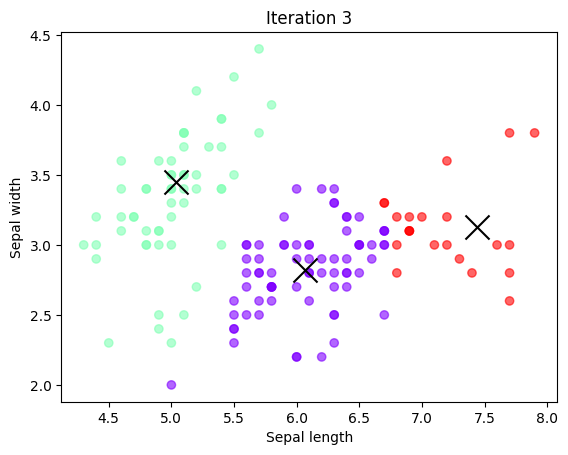

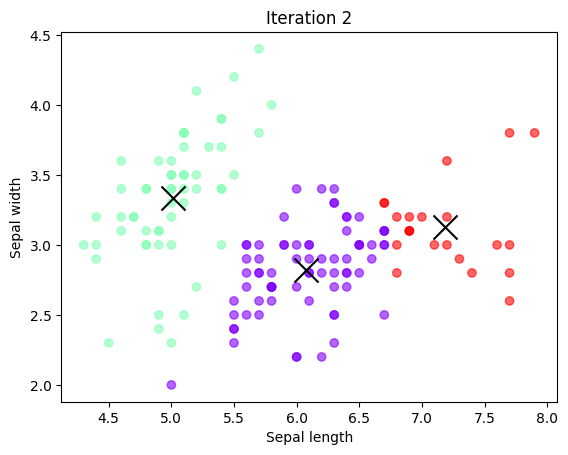

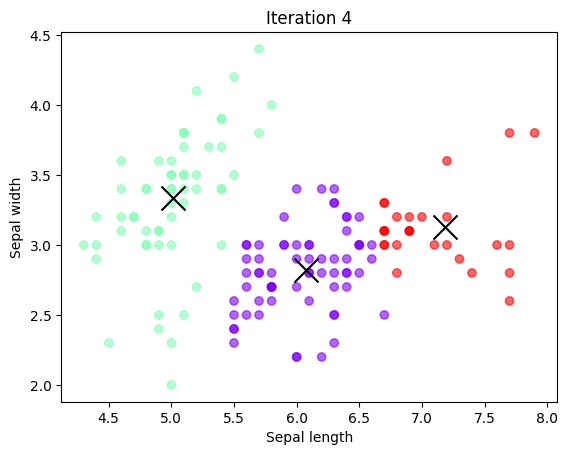

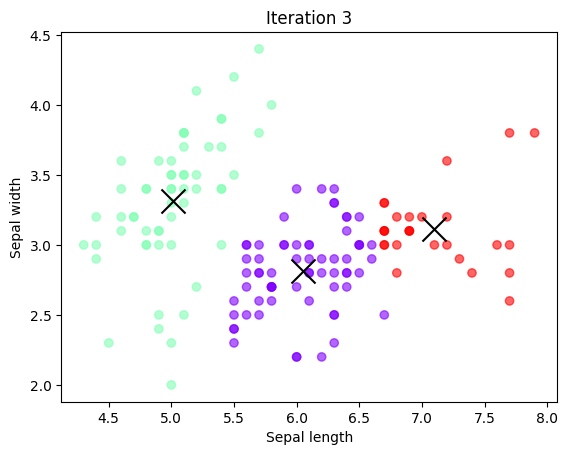

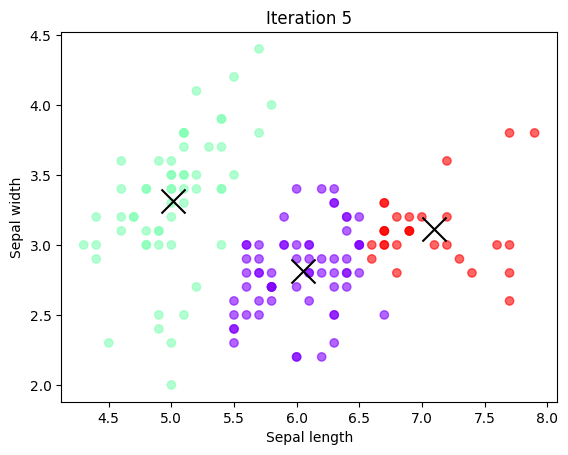

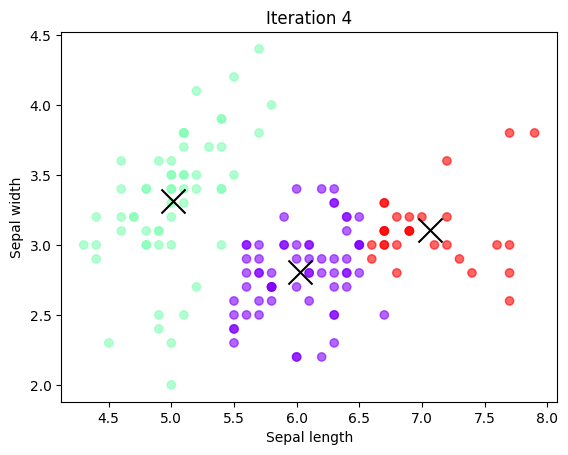

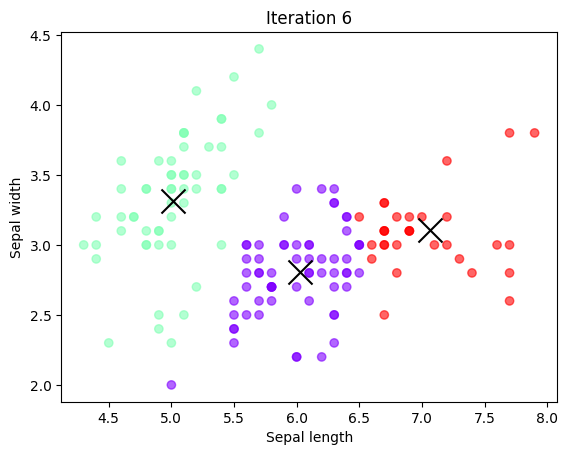

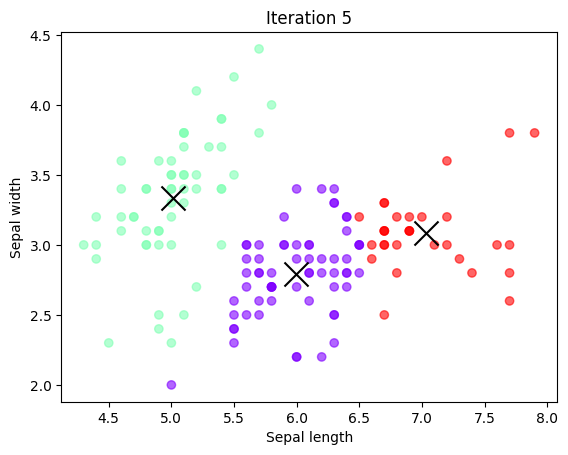

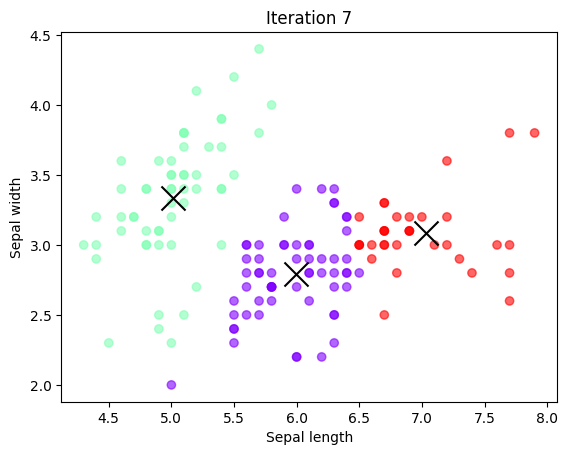

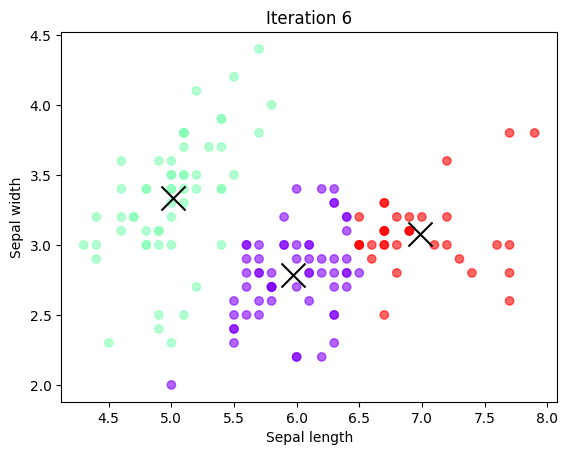

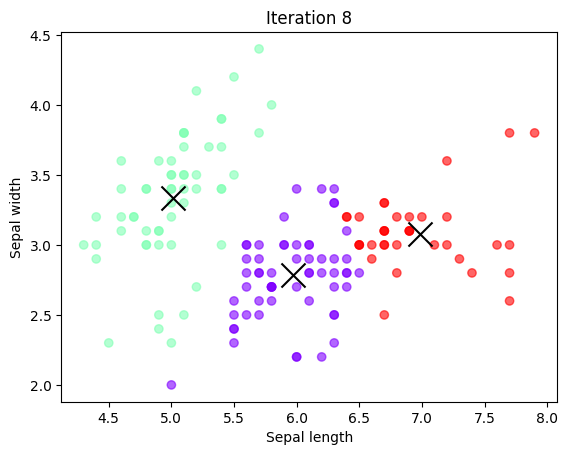

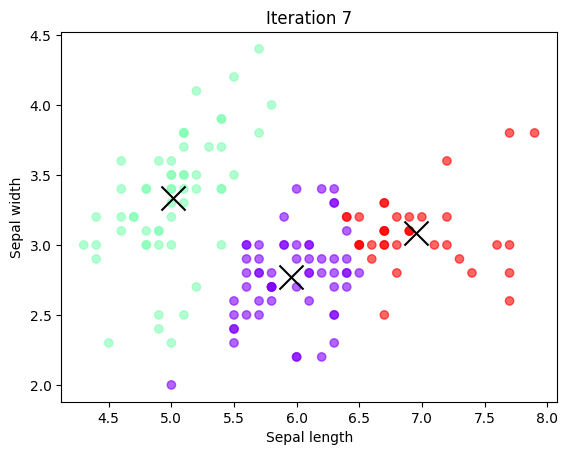

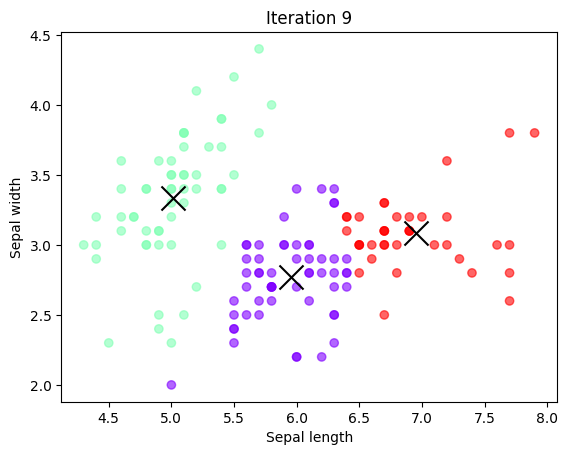

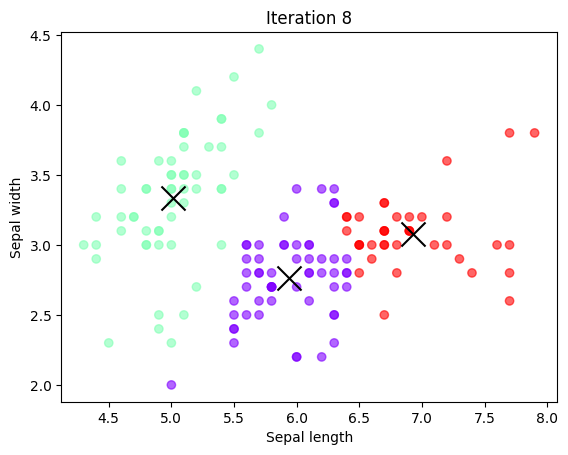

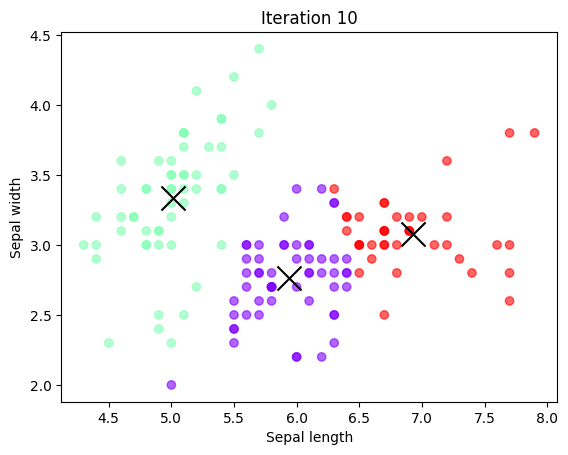

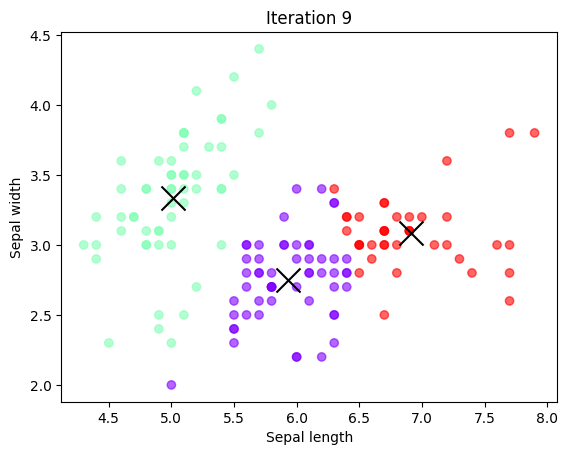

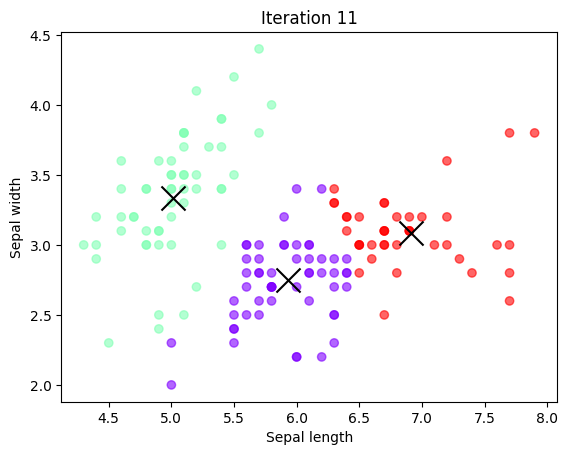

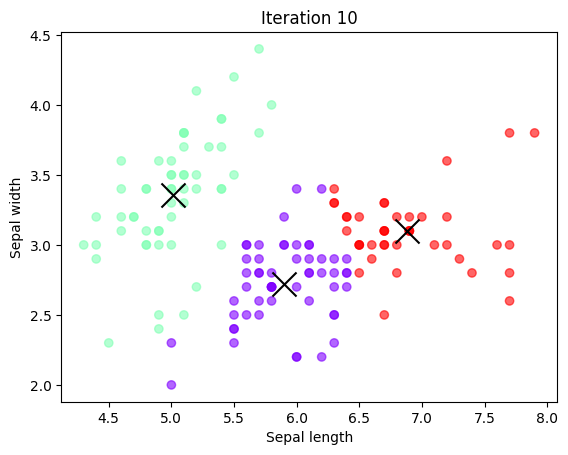

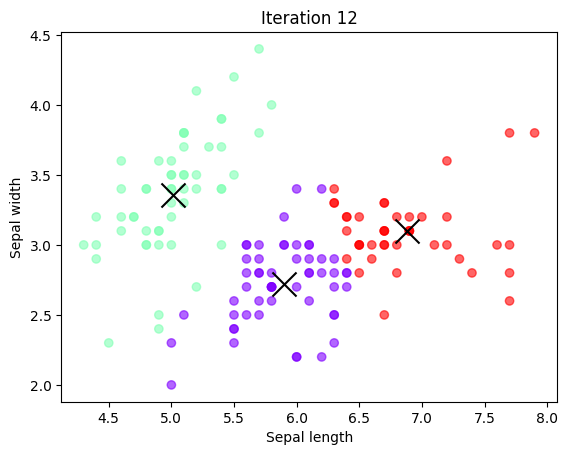

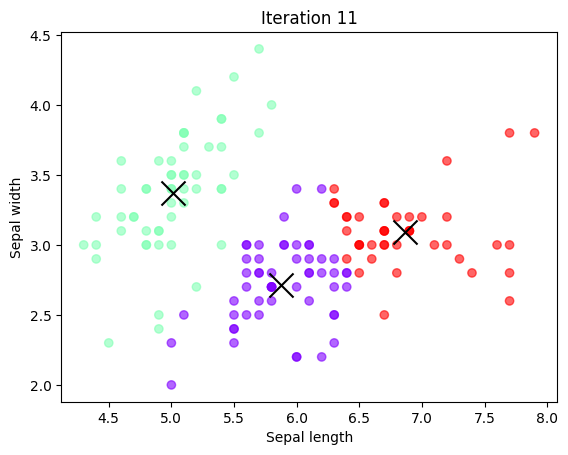

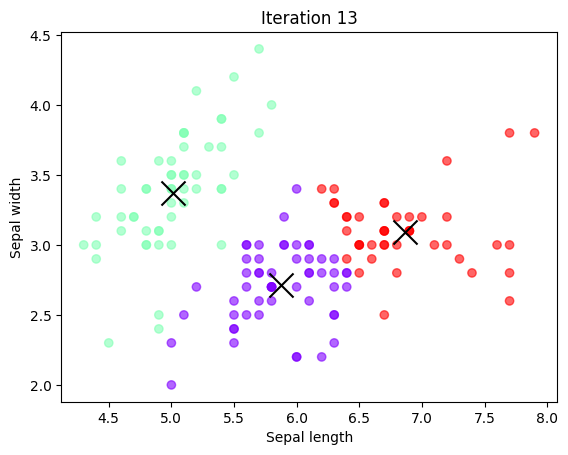

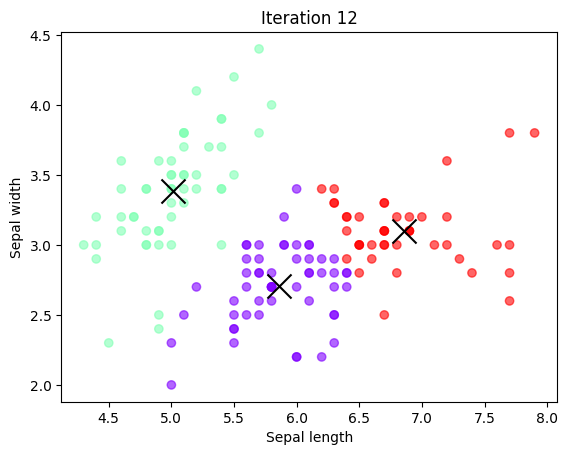

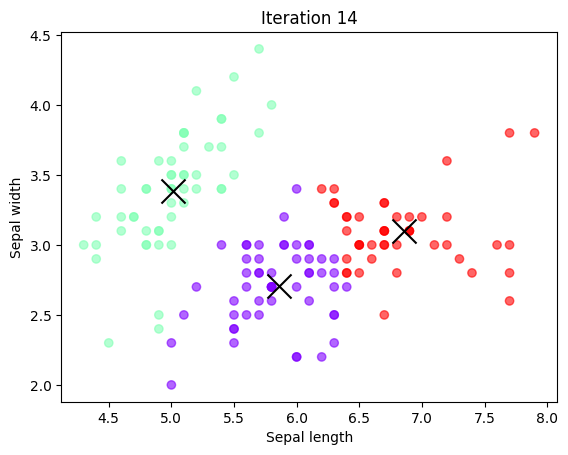

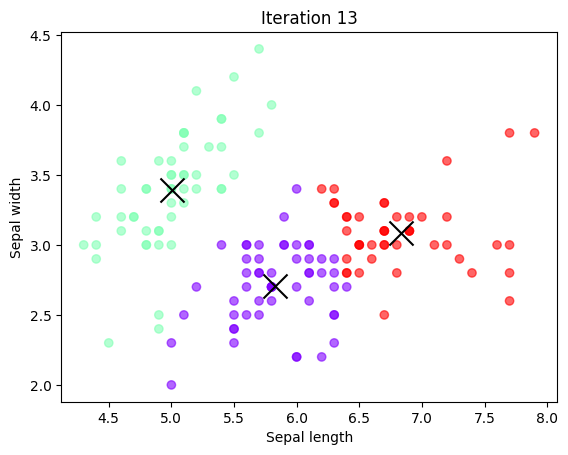

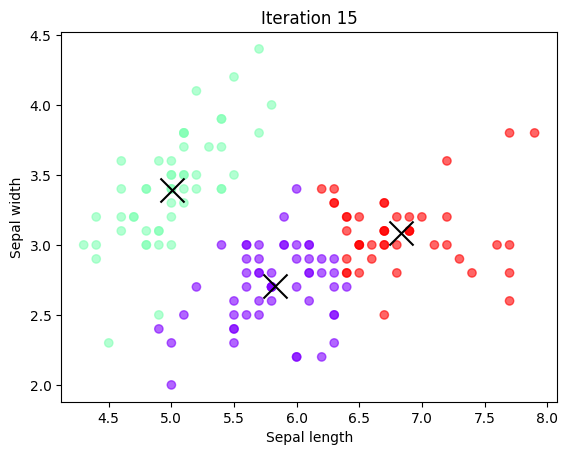

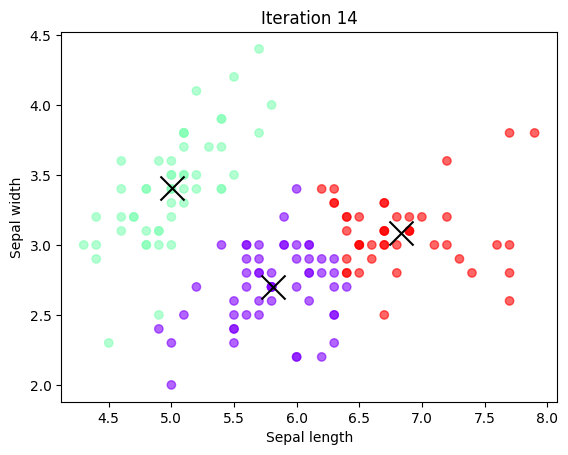

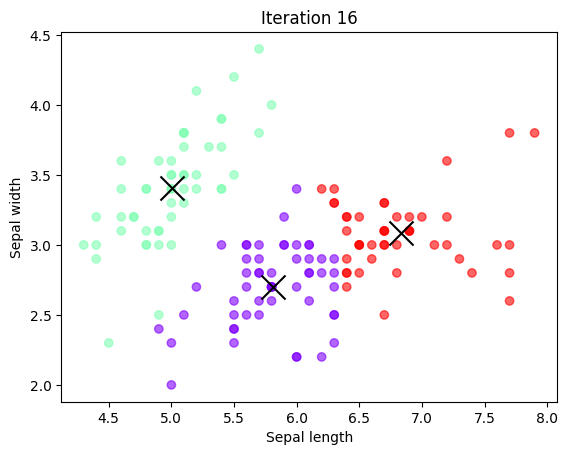

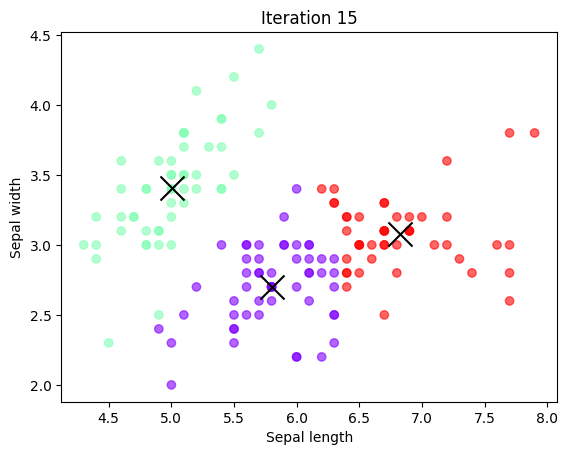

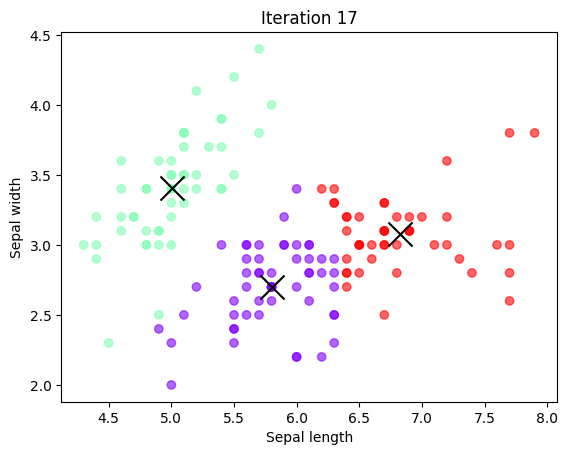

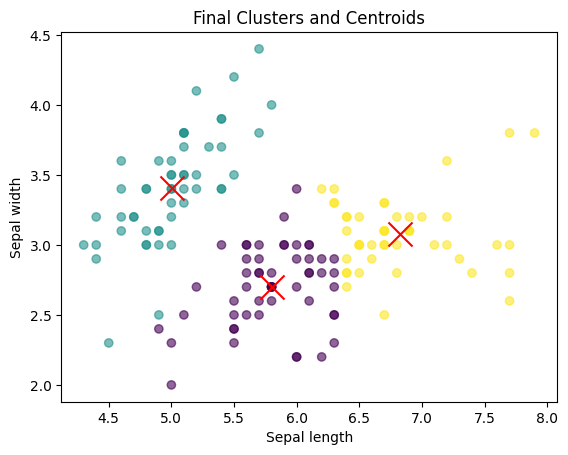

(array([[5.8       , 2.7       ],
        [5.00392157, 3.40980392],
        [6.82391304, 3.07826087]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]))

In [95]:
kmeans = K_mean(k=3)
kmeans.fit(data)

## multiple choice

In [96]:
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

print(data)


[[2.  3.  1.5]
 [3.  3.5 2. ]
 [3.5 3.  2.5]
 [8.  8.  7.5]
 [8.5 8.5 8. ]
 [9.  8.  8.5]
 [1.  2.  1. ]
 [1.5 2.5 1.5]]


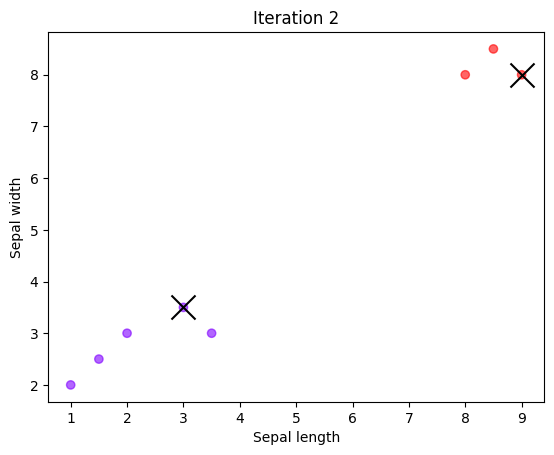

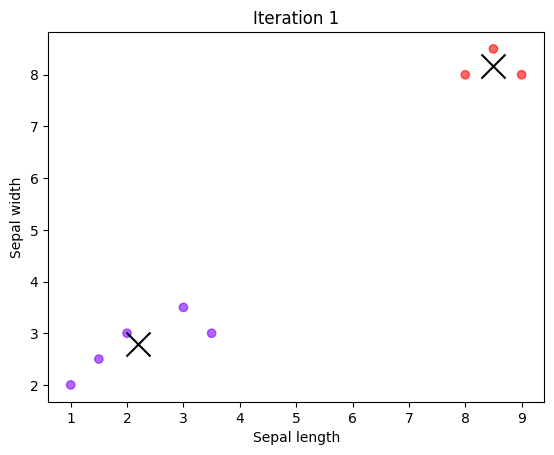

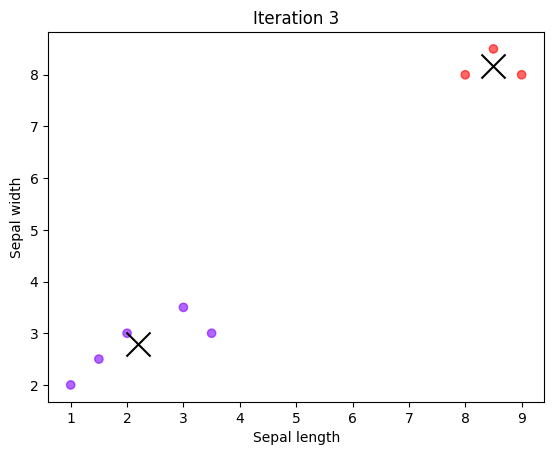

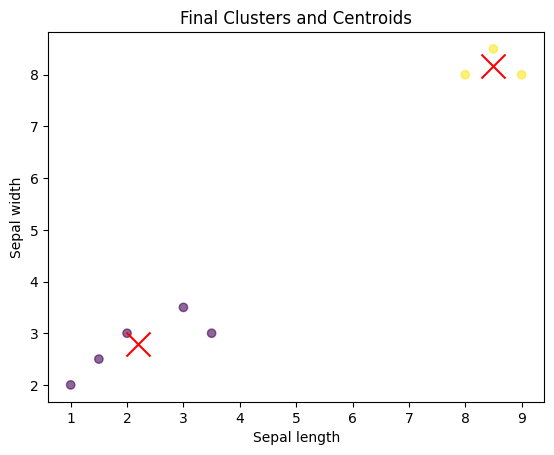

(array([[2.2       , 2.8       , 1.7       ],
        [8.5       , 8.16666667, 8.        ]]),
 array([0, 0, 0, 1, 1, 1, 0, 0]))

In [98]:
kmeans = K_mean(k=2)
kmeans.fit(data)

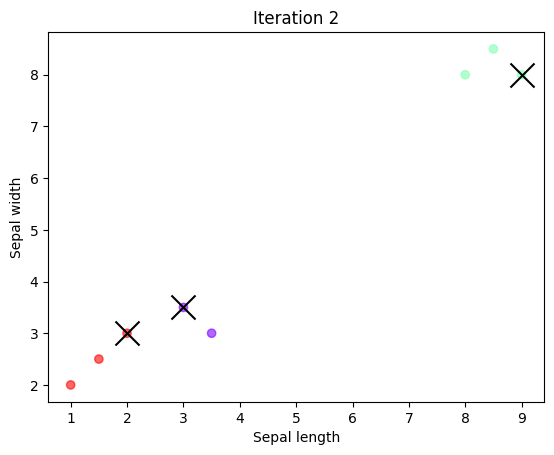

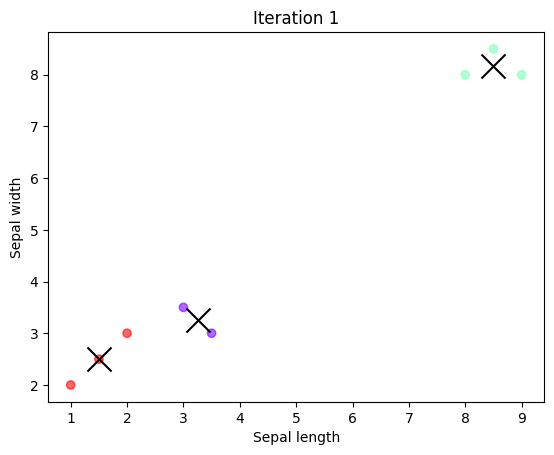

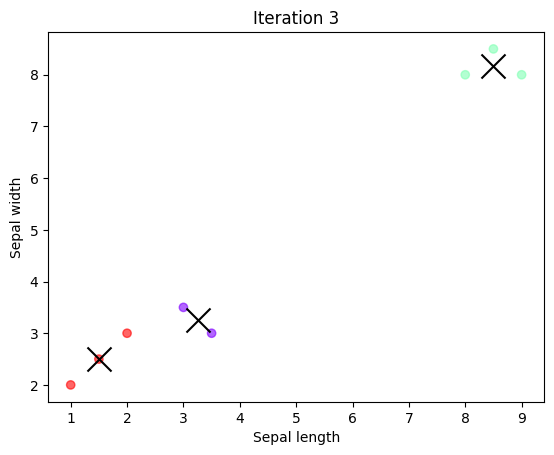

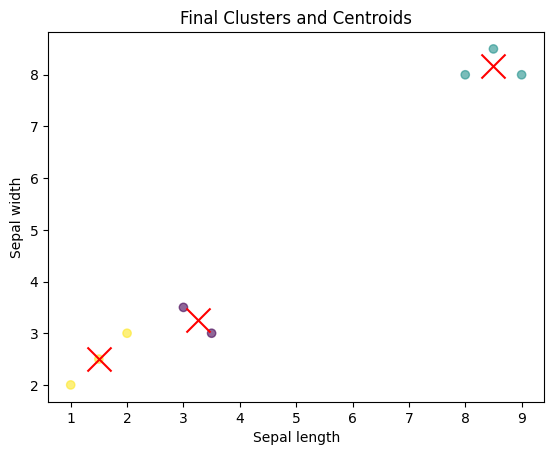

(array([[3.25      , 3.25      , 2.25      ],
        [8.5       , 8.16666667, 8.        ],
        [1.5       , 2.5       , 1.33333333]]),
 array([2, 0, 0, 1, 1, 1, 2, 2]))

In [97]:
kmeans = K_mean(k=3)
kmeans.fit(data)